In [222]:
import torch 
import torch.nn as nn
import rnn_nc_utils as utl
import matplotlib.pyplot as plt

In [223]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


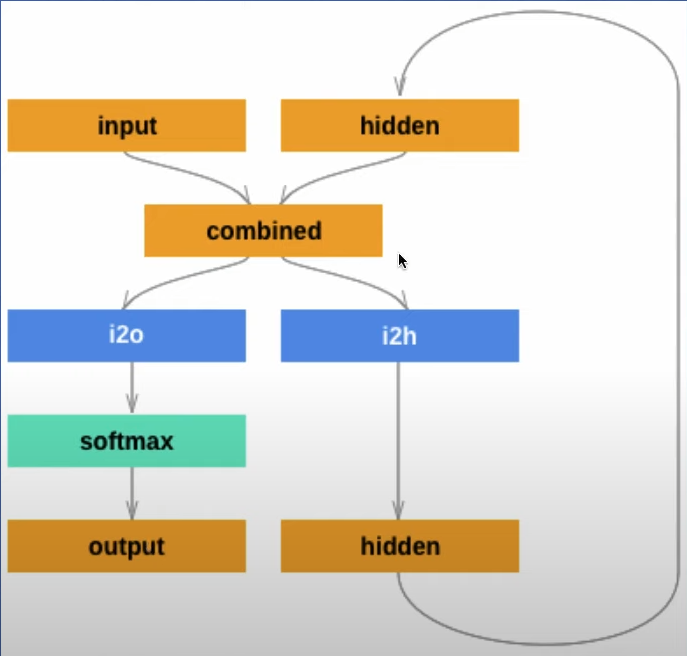

In [244]:
tensor_a = utl.letter_to_tensor('g')  
print(tensor_a,tensor_a.shape)
out=nn.Softmax(1)(tensor_a + torch.rand((1,57)))
out

tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]]) torch.Size([1, 57])


tensor([[0.0156, 0.0255, 0.0117, 0.0148, 0.0240, 0.0137, 0.0383, 0.0233, 0.0186,
         0.0267, 0.0134, 0.0148, 0.0179, 0.0264, 0.0118, 0.0181, 0.0219, 0.0156,
         0.0223, 0.0128, 0.0132, 0.0129, 0.0147, 0.0124, 0.0208, 0.0244, 0.0188,
         0.0169, 0.0111, 0.0175, 0.0140, 0.0202, 0.0115, 0.0192, 0.0144, 0.0262,
         0.0148, 0.0115, 0.0269, 0.0218, 0.0107, 0.0135, 0.0141, 0.0135, 0.0163,
         0.0182, 0.0137, 0.0261, 0.0105, 0.0150, 0.0202, 0.0234, 0.0113, 0.0168,
         0.0179, 0.0158, 0.0123]])

In [245]:

class RNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        # calling the super
        super(RNN,self).__init__()
        # we need it later
        self.hidden_size = hidden_size
        # defining layers
        self.i2h = nn.Linear(input_size+hidden_size,hidden_size)
        self.i2o = nn.Linear(input_size+hidden_size,output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self,input_tensor,hidden_tensor):
        # cat combine the tensors according to the dimp
        combined = torch.cat((input_tensor,hidden_tensor),1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return hidden,output
    
    def init_hidden(self):
        return torch.zeros(1,self.hidden_size)        

In [234]:
# loading data
lines_per_categ,all_categories = utl.load_data()

print(all_categories,type(all_categories),sep="\n")
print(lines_per_categ["Arabic"],type(lines_per_categ),sep="\n")

['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese']
<class 'list'>
['Khoury', 'Nahas', 'Daher', 'Gerges', 'Nazari', 'Maalouf', 'Gerges', 'Naifeh', 'Guirguis', 'Baba', 'Sabbagh', 'Attia', 'Tahan', 'Haddad', 'Aswad', 'Najjar', 'Dagher', 'Maloof', 'Isa', 'Asghar', 'Nader', 'Gaber', 'Abboud', 'Maalouf', 'Zogby', 'Srour', 'Bahar', 'Mustafa', 'Hanania', 'Daher', 'Tuma', 'Nahas', 'Saliba', 'Shamoon', 'Handal', 'Baba', 'Amari', 'Bahar', 'Atiyeh', 'Said', 'Khouri', 'Tahan', 'Baba', 'Mustafa', 'Guirguis', 'Sleiman', 'Seif', 'Dagher', 'Bahar', 'Gaber', 'Harb', 'Seif', 'Asker', 'Nader', 'Antar', 'Awad', 'Srour', 'Shadid', 'Hajjar', 'Hanania', 'Kalb', 'Shadid', 'Bazzi', 'Mustafa', 'Masih', 'Ghanem', 'Haddad', 'Isa', 'Antoun', 'Sarraf', 'Sleiman', 'Dagher', 'Najjar', 'Malouf', 'Nahas', 'Naser', 'Saliba', 'Shamon', 'Malouf', 'Kalb', 'Daher', 'Maalouf', 'Wasem',

In [235]:
# hepler params
input_size = utl.N_LETTERS
print("input_size",input_size)

output_size = len(all_categories)
print("output_size",output_size)

input_size 57
output_size 18


In [246]:
# initialazing the model
hidden_size = 128
rnn = RNN(input_size,hidden_size,output_size).to(device)

In [237]:
def category_from_output(output):
    categ_index = torch.argmax(output,1).item()
    return all_categories[categ_index]

In [252]:
# one step
input_tensor = utl.letter_to_tensor('a').to(device)
hidden_tensor = rnn.init_hidden().to(device)
print("hidden_tensor",hidden_tensor,hidden_tensor.size())
print("input_tensor",input_tensor,input_tensor.shape)
next_hidden,output = rnn(input_tensor,hidden_tensor)
print("next_hidden",next_hidden,next_hidden.shape)
print("output",output,output.shape)

hidden_tensor tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0') torch.Size([1, 128])
input_tensor tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]], device='cuda:0') torch.Size([1, 57])
next_hidden tensor([[-0.0719, -0.0543,  0.0142,  0.0250, -0.0708

In [247]:
criterion = nn.NLLLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(rnn.parameters(),lr=learning_rate)

In [253]:
def train(line_tensor, category_tensor):
    hidden = rnn.init_hidden().to(device)
    # to device
    line_tensor = line_tensor.to(device)
    category_tensor = category_tensor.to(device)
    for i in range(line_tensor.size()[0]):
        hidden,output  = rnn(line_tensor[i], hidden)
        
    loss = criterion(output, category_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return output, loss.item()

In [240]:
category, line, category_tensor, line_tensor = utl.random_training_example(lines_per_categ, all_categories)
print("category",category)
print("line",line)
print("category_tensor",category_tensor)
print("line_tensor",line_tensor)

category Chinese
line Mui
category_tensor tensor([1])
line_tensor tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]]])


In [254]:
current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000
n_iters = 100000
for i in range(n_iters):
    category, line, category_tensor, line_tensor = utl.random_training_example(lines_per_categ, all_categories)
    
    output, loss = train(line_tensor, category_tensor)
    current_loss += loss 
    
    if (i+1) % plot_steps == 0:
        # appending the mean loss ea
        all_losses.append(current_loss / plot_steps)
        current_loss = 0
        
    if (i+1) % print_steps == 0:
        guess = category_from_output(output)
        correct = "CORRECT" if guess == category else f"WRONG ({category})"
        print(f"samples {i+1} {(i+1)/n_iters*100} loss {loss:.4f} {line} / {guess} {correct}")        
    
plt.figure()
plt.plot(all_losses)
plt.show()


samples 5000 5.0 loss 2.8940 Blanco / Italian WRONG (Spanish)
